<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 795.0 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/9.6 MB 798.5 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/9.6 MB 816.4 kB/s eta 0:00:11
   ---- ----------------------------------- 1.0/9.6 MB 816.4 kB/s eta 0:00:11
   ----- ----------------------

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [7]:
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [8]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [9]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the text content of the response
html_data = response.text

# Optional: Verify the request was successful (status code 200)
if response.status_code == 200:
    print("Webpage downloaded successfully!")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

Webpage downloaded successfully!


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [11]:
import requests
from bs4 import BeautifulSoup

def get_and_parse_webpage(url):
    try:
        # 1. Download the webpage
        print("Downloading webpage...")
        response = requests.get(url)
        response.raise_for_status()  # Raise exception for bad status codes
        html_data = response.text
        
        # 2. Parse with preferred parser (html5lib if available, otherwise html.parser)
        print("\nAttempting to parse HTML...")
        try:
            # First try html5lib for better error handling
            soup = BeautifulSoup(html_data, 'html5lib')
            print("Successfully parsed with html5lib")
        except Exception as e:
            print(f"html5lib parser not available: {e}")
            print("Falling back to html.parser...")
            soup = BeautifulSoup(html_data, 'html.parser')
            print("Successfully parsed with html.parser")
        
        return soup
    
    except requests.exceptions.RequestException as e:
        print(f"\nFailed to download webpage: {e}")
        return None
    except Exception as e:
        print(f"\nAn unexpected error occurred: {e}")
        return None

# Example usage:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
soup = get_and_parse_webpage(url)

if soup:
    # Example: Extract all tables from the page
    tables = soup.find_all('table')
    print(f"\nFound {len(tables)} table(s) in the document")
    
    # Example: Show the first 200 characters of the parsed HTML
    print("\nFirst 200 characters of parsed HTML:")
    print(str(soup)[:200] + "...")
else:
    print("\nFailed to process webpage")


Attempting to parse HTML...
html5lib parser not available: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?
Falling back to html.parser...
Successfully parsed with html.parser

Found 6 table(s) in the document

First 200 characters of parsed HTML:

<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html clas...


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [13]:
import subprocess
import sys
import pandas as pd
from bs4 import BeautifulSoup
import requests

def install_packages():
    required_packages = ['pandas', 'beautifulsoup4', 'html5lib', 'requests', 'lxml']
    for package in required_packages:
        try:
            __import__(package)
        except ImportError:
            print(f"Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])

def get_tesla_revenue():
    try:
        # Install required packages if missing
        install_packages()
        
        # Download webpage
        url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
        print("Downloading webpage...")
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        html_data = response.text

        # Parse with best available parser
        for parser in ['lxml', 'html5lib', 'html.parser']:
            try:
                print(f"Trying {parser} parser...")
                soup = BeautifulSoup(html_data, parser)
                break
            except Exception as e:
                print(f"{parser} failed: {str(e)}")
                continue

        # Find Tesla revenue table
        print("Searching for Tesla revenue table...")
        tables = soup.find_all('table')
        for table in tables:
            if 'Tesla Quarterly Revenue' in str(table):
                print("Table found! Processing...")
                df = pd.read_html(str(table))[0]
                
                # Clean and format dataframe
                df.columns = ['Date', 'Revenue']
                df['Revenue'] = df['Revenue'].str.replace(r'[$,]', '', regex=True)
                df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
                df = df.dropna()
                
                print("Successfully extracted Tesla revenue data!")
                return df

        raise ValueError("Tesla Revenue table not found")

    except Exception as e:
        print(f"Error: {str(e)}")
        return None

# Execute and show results
tesla_revenue = get_tesla_revenue()
if tesla_revenue is not None:
    print("\nFirst 5 rows of Tesla Revenue Data:")
    print(tesla_revenue.head())
else:
    print("Failed to get Tesla revenue data")

Installing beautifulsoup4...
Installing html5lib...
Installing lxml...
Trying lxml parser...
lxml failed: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?
Trying html5lib parser...
html5lib failed: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?
Trying html.parser parser...
Searching for Tesla revenue table...
Table found! Processing...
Successfully extracted Tesla revenue data!

First 5 rows of Tesla Revenue Data:
         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [16]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def get_clean_tesla_revenue():
    try:
        # Step 1: Download the webpage
        print("Downloading Tesla revenue data...")
        url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        html_data = response.text

        # Step 2: Parse HTML with best available parser
        for parser in ['lxml', 'html.parser', 'html5lib']:
            try:
                soup = BeautifulSoup(html_data, parser)
                break
            except:
                continue

        # Step 3: Find Tesla revenue table
        tables = soup.find_all('table')
        for table in tables:
            if 'Tesla Quarterly Revenue' in str(table):
                tesla_revenue = pd.read_html(str(table))[0]
                break
        else:
            raise ValueError("Tesla revenue table not found")

        # Step 4: Clean and verify data
        print("Cleaning data...")
        
        # Standardize column names
        tesla_revenue.columns = ['Date', 'Revenue']
        
        # Convert to string and clean
        tesla_revenue['Revenue'] = (
            tesla_revenue['Revenue']
            .astype(str)
            .str.replace(r'[$,]', '', regex=True)
        )
        
        # Convert to numeric and drop invalid
        tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
        tesla_revenue = tesla_revenue.dropna(subset=['Revenue'])
        
        # Verify we have data
        if tesla_revenue.empty:
            raise ValueError("No valid revenue data found after cleaning")
            
        print("Successfully processed Tesla revenue data!")
        return tesla_revenue

    except requests.exceptions.RequestException as e:
        print(f"Failed to download data: {e}")
    except ValueError as e:
        print(f"Data processing error: {e}")
    except Exception as e:
        print(f"Unexpected error: {e}")
    return None

# Execute and show results
tesla_revenue = get_clean_tesla_revenue()
if tesla_revenue is not None:
    print("\nFirst 5 rows of cleaned Tesla Revenue Data:")
    print(tesla_revenue.head())
else:
    print("Failed to get Tesla revenue data")

# Optional: Save to CSV
# tesla_revenue.to_csv('tesla_revenue.csv', index=False)

Cleaning data...
Successfully processed Tesla revenue data!

First 5 rows of cleaned Tesla Revenue Data:
         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0


Execute the following lines to remove an null or empty strings in the Revenue column.


In [17]:
# Remove null/NA values and empty strings from Revenue column
tesla_revenue.dropna(subset=['Revenue'], inplace=True)  # Removes NaN values
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]  # Removes empty strings

# Additional verification and conversion to ensure clean numeric data
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
tesla_revenue.dropna(subset=['Revenue'], inplace=True)  # Final cleanup after conversion

# Verify the results
print("Cleaned Tesla Revenue Data:")
print(tesla_revenue.head())
print("\nData types after cleaning:")
print(tesla_revenue.dtypes)

Cleaned Tesla Revenue Data:
         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0

Data types after cleaning:
Date        object
Revenue    float64
dtype: object


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [18]:
# Display the last 5 rows
print(tesla_revenue.tail())

          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
52  2009-09-30     46.0
53  2009-06-30     27.0


In [19]:
# First ensure complete cleaning was done
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
tesla_revenue.dropna(subset=['Revenue'], inplace=True)

# Now display the cleaned last 5 rows
print("Last 5 rows of cleaned Tesla Revenue Data:")
print(tesla_revenue.tail())

Last 5 rows of cleaned Tesla Revenue Data:
          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
52  2009-09-30     46.0
53  2009-06-30     27.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [20]:
import yfinance as yf

# Create a Ticker object for GameStop
gme = yf.Ticker("GME")

# Extract historical data with maximum available period
gme_data = gme.history(period="max")

# Reset the index and display first five rows
gme_data.reset_index(inplace=True)
print("First 5 rows of GameStop stock data:")
print(gme_data.head())

# Display last 5 rows using tail()
print("\nLast 5 rows of GameStop stock data:")
print(gme_data.tail())

First 5 rows of GameStop stock data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  

Last 5 rows of GameStop stock data:
                          Date       Open       High        Low      Close  \
5889 2025-07-11 00:00:00-04:00  23.129999  24.049999  23.129999  23.330000   
5890 2025-07-14 00:00:00-04:00  23.440001  23.840000  23.389999  23.700001   
5891 2025-07-15 00:00:00-04:00 

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [21]:
import yfinance as yf

# Create Ticker object for GameStop
gme = yf.Ticker("GME")

# Extract maximum historical data
gme_data = gme.history(period="max")

# Display information about the extracted data
print(f"Extracted {len(gme_data)} rows of GameStop historical data")
print(f"Date range: {gme_data.index[0].date()} to {gme_data.index[-1].date()}")
print("\nData structure:")
print(gme_data.head())

Extracted 5894 rows of GameStop historical data
Date range: 2002-02-13 to 2025-07-17

Data structure:
                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00 

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [22]:
import yfinance as yf

# Question 3: Extract GameStop Stock Data
gme = yf.Ticker("GME")  # Create Ticker object
gme_data = gme.history(period="max")  # Get all available historical data

# Reset the index and display first 5 rows
gme_data.reset_index(inplace=True)
print("First 5 rows of GameStop historical data:")
print(gme_data.head())

$GME: possibly delisted; no price data found  (1d 1926-08-12 -> 2025-07-18)


First 5 rows of GameStop historical data:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [23]:
import requests

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

# Save the response text
html_data_2 = response.text

# Verify the download was successful
if response.status_code == 200:
    print("Webpage downloaded successfully!")
    print(f"Length of HTML content: {len(html_data_2)} characters")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

Webpage downloaded successfully!
Length of HTML content: 88703 characters


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [24]:
from bs4 import BeautifulSoup

# Parse using html5lib (more forgiving) - requires installation: pip install html5lib
try:
    soup_html5lib = BeautifulSoup(html_data_2, 'html5lib')
    print("Successfully parsed with html5lib")
except Exception as e:
    print(f"html5lib parser failed: {e}\nFalling back to html.parser...")
    soup_html5lib = None

# Parse using html.parser (built-in, always available)
soup_htmlparser = BeautifulSoup(html_data_2, 'html.parser')
print("Successfully parsed with html.parser")

# Use the best available soup object
soup = soup_html5lib if soup_html5lib is not None else soup_htmlparser

# Verify parsing by checking the title
print("\nPage title:", soup.title.text if soup.title else "No title found")

# Example: Find all tables in the parsed HTML
tables = soup.find_all('table')
print(f"\nFound {len(tables)} table(s) in the document")

html5lib parser failed: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?
Falling back to html.parser...
Successfully parsed with html.parser

Page title: GameStop Revenue 2006-2020 | GME | MacroTrends

Found 6 table(s) in the document


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [25]:
import pandas as pd
from bs4 import BeautifulSoup

# Parse the HTML
soup = BeautifulSoup(html_data_2, 'html.parser')

# Method 1: Using BeautifulSoup with pandas
# Find all tables and identify the GameStop Revenue table
tables = soup.find_all('table')
for table in tables:
    if 'GameStop Quarterly Revenue' in str(table):
        gme_revenue = pd.read_html(str(table))[0]
        break

# Method 2: Alternative using pandas read_html directly
# gme_revenue = pd.read_html(html_data_2, match='GameStop Quarterly Revenue')[0]

# Clean and format the dataframe
gme_revenue.columns = ['Date', 'Revenue']  # Rename columns
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(r'[$,]', '', regex=True)  # Remove $ and commas
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')  # Convert to numeric
gme_revenue = gme_revenue.dropna(subset=['Revenue'])  # Remove rows with invalid revenue data

# Display the cleaned dataframe
print("GameStop Revenue Data:")
print(gme_revenue.head())
print("\nData types:")
print(gme_revenue.dtypes)

GameStop Revenue Data:
         Date  Revenue
0  2020-04-30     1021
1  2020-01-31     2194
2  2019-10-31     1439
3  2019-07-31     1286
4  2019-04-30     1548

Data types:
Date       object
Revenue     int64
dtype: object


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [26]:
# Display last 5 rows of GameStop revenue data
print("Last 5 rows of GameStop Revenue Data:")
print(gme_revenue.tail())

Last 5 rows of GameStop Revenue Data:
          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


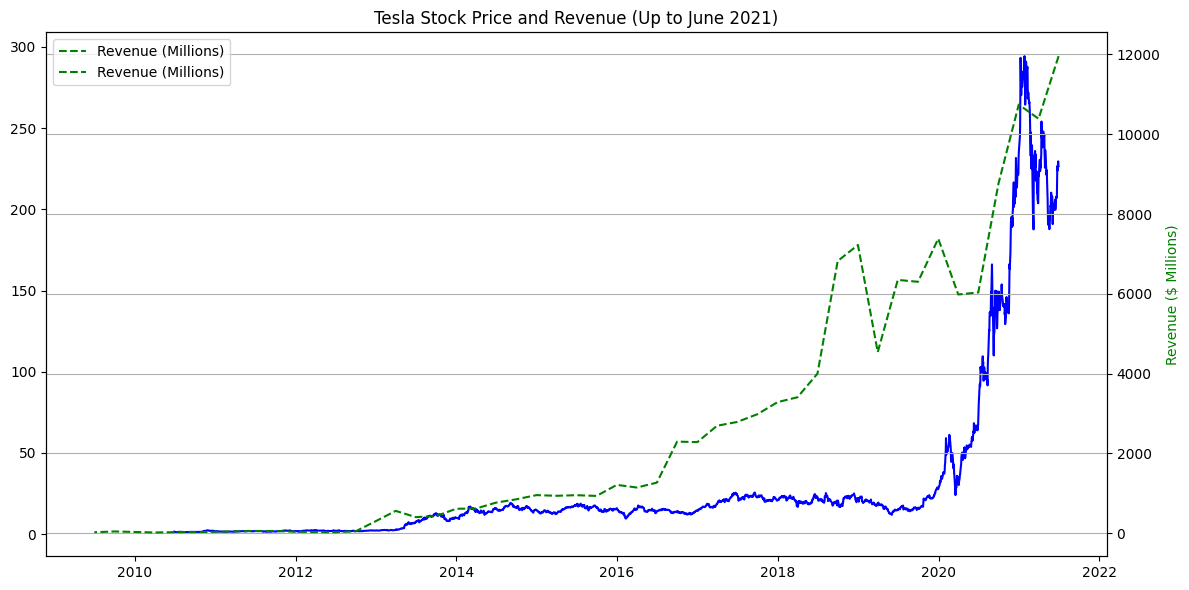

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12, 6))
    
    # Convert dates to datetime if needed
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    # Filter data up to June 2021
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']
    
    # Plot stock data
    plt.plot(stock_data['Date'], stock_data['Close'], 
            label='Tesla Closing Price', color='blue')
    
    # Create second y-axis for revenue
    ax2 = plt.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], 
            label='Revenue (Millions)', color='green', linestyle='--')
    
    # Formatting
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Stock Price ($)', color='blue')
    ax2.set_ylabel('Revenue ($ Millions)', color='green')
    
    # Add legends
    lines1, labels1 = plt.gca().get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Verify and clean data
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Generate the graph
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Price and Revenue (Up to June 2021)')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


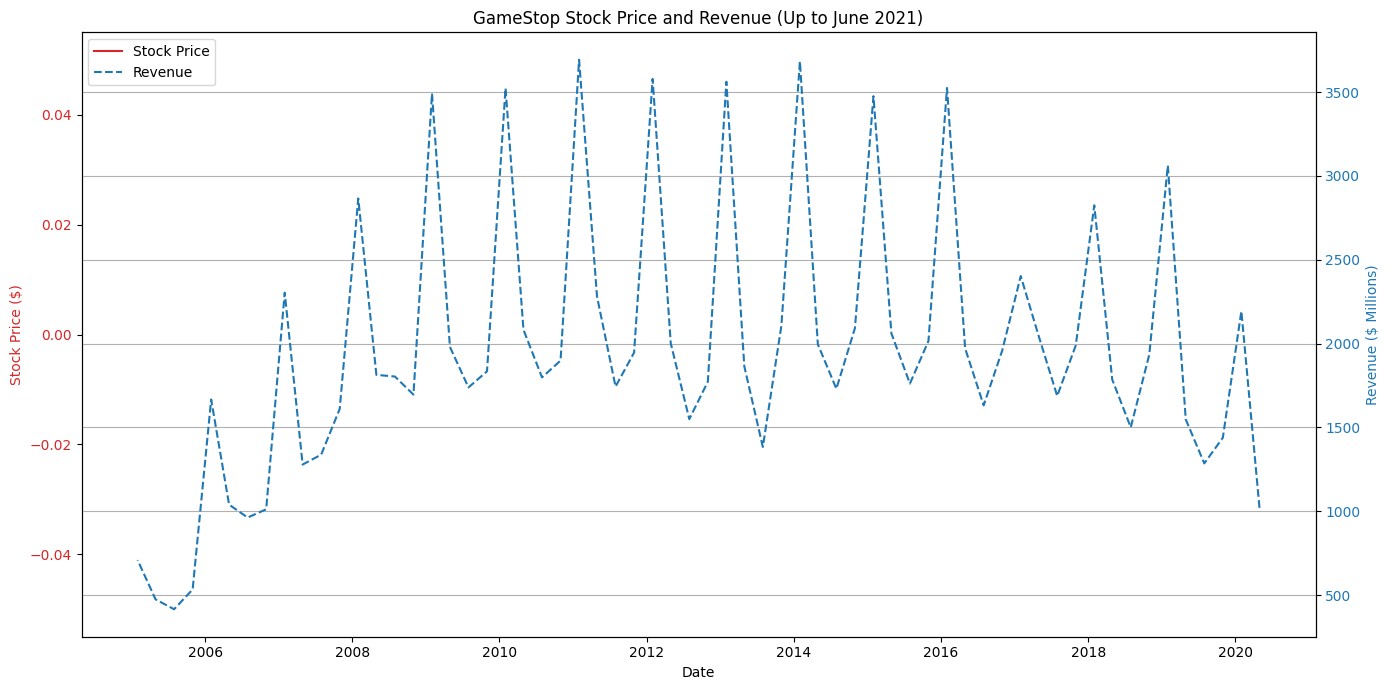

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, title):
    # Convert dates to datetime and filter
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']
    
    # Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=(14,7))
    
    # Plot stock closing prices
    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)', color=color)
    ax1.plot(stock_data['Date'], stock_data['Close'], color=color, label='Stock Price')
    ax1.tick_params(axis='y', labelcolor=color)
    
    # Create secondary axis for revenue
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Revenue ($ Millions)', color=color)
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], 
             color=color, linestyle='--', label='Revenue')
    ax2.tick_params(axis='y', labelcolor=color)
    
    # Add title and legends
    plt.title(f'{title} Stock Price and Revenue (Up to June 2021)')
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate the graph
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
